In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [2]:
! pip install skimpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: polars
    Found existing installation: polars 1.15.0
    Uninstalling polars-1.15.0:
      Successfully uninstalled polars-1.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.1.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is inco

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np 
import pandas as pd 
from skimpy import skim
import missingno as msno


## Data Overview

In [4]:
data = pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")

In [5]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [6]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [7]:
data.describe(include='object')

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

In [8]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2938   │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 22     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year        │   0 │     0 │     2008 │    4.614 │  2000 │   2004 │    2008 │    2012 │       2015 │ ▇▅▇▅▇▇ │  │
│ │ Life        │  10 │  0.34 │    69.22 │    9.524 │  36.3 │   63.1 │    72.1 │    75.7 │         89 │  ▁▃▅▇▂ │  │
│ │ expectancy  │     │       │          │          │       │        │         │         │            │        │  │
│ │ Adult       │  10 │  0.34 │    164.8 │    124.3 │     1 │     74 │     144 │     228 │        723 │  ▇▇▃▁  │  │
│ │ Mortality   │     │       │          │          │       │        │         │         │            │        │  │
│ │ infant      │   0 │     0 │     30.3 │    117.9 │     0 │      0 │       3 │      22 │       1800 │   ▇    │  │
│ │ deaths      │     │       │          │          │       │        │         │         │            │        │  │
│ │ Alcohol     │ 194 │   6.6 │    4.603 │    4.052 │  0.01 │ 0.8775 │   3.755 │   7.703 │      17.87 │ ▇▃▃▂▁  │  │
│ │ percentage  │   0 │     0 │    738.3 │     1988 │     0 │  4.685 │   64.91 │   441.5 │      19480 │   ▇    │  │
│ │ expenditure │     │       │          │          │       │        │         │         │            │        │  │
│ │ Hepatitis B │ 553 │ 18.82 │    80.94 │    25.07 │     1 │     77 │      92 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Measles     │   0 │     0 │     2420 │    11470 │     0 │      0 │      17 │   360.2 │     212200 │   ▇    │  │
│ │  BMI        │  34 │  1.16 │    38.32 │    20.04 │     1 │   19.3 │    43.5 │    56.2 │       87.3 │ ▃▆▃▇▃  │  │
│ │ under-five  │   0 │     0 │    42.04 │    160.4 │     0 │      0 │       4 │      28 │       2500 │   ▇    │  │
│ │ deaths      │     │       │          │          │       │        │         │         │            │        │  │
│ │ Polio       │  19 │  0.65 │    82.55 │    23.43 │     3 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Total       │ 226 │  7.69 │    5.938 │    2.498 │  0.37 │   4.26 │   5.755 │   7.492 │       17.6 │  ▂▇▆▂  │  │
│ │ expenditure │     │       │          │          │       │        │         │         │            │        │  │
│ │ Diphtheria  │  19 │  0.65 │    82.32 │    23.72 │     2 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │  HIV/AIDS   │   0 │     0 │    1.742 │    5.078 │   0.1 │    0.1 │     0.1 │     0.8 │       50.6 │   ▇    │  │
│ │ GDP         │ 448 │ 15.25 │     7483 │    14270 │ 1.681 │  463.9 │    1767 │    5911 │     119200 │   ▇▁   │  │
│ │ Population  │ 652 │ 22.19 │ 12750000 │ 61010000 │   

In [9]:
print(data.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [10]:
print(data.Year.unique())

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]


In [11]:
print(data.keys())

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [12]:
data.rename(columns = lambda x: x.strip(), inplace=True)

In [13]:
print(data.keys())

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [14]:
print(data.Status.unique())

['Developing' 'Developed']


## Create a basic Linear regression model with mean filled NaN prior to any data cleaning

In [15]:
# from sklearn.linear_model import LinearRegression

# unfiltered = data.fillna(value=mean_value, inplace=True) 
# reg_1 = LinearRegression.fit()

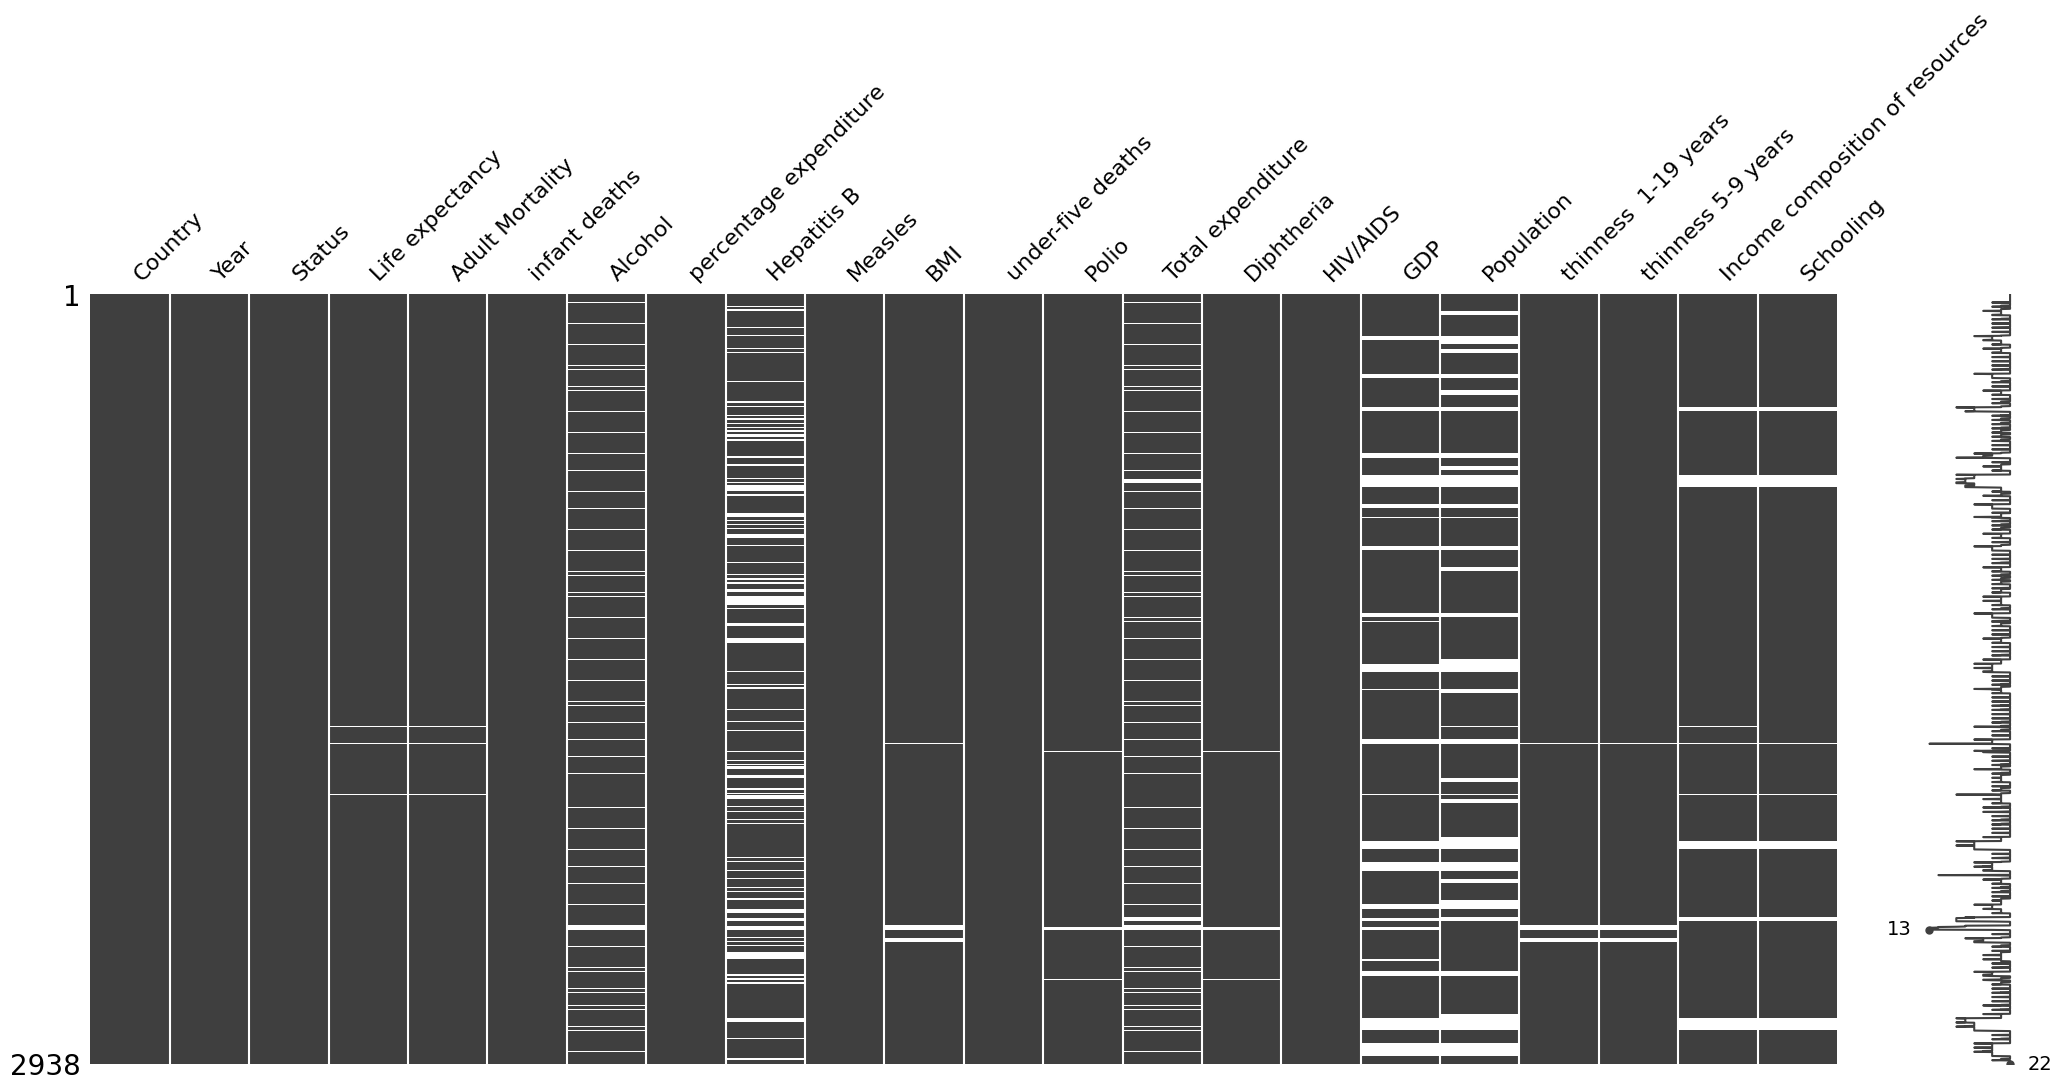

In [16]:
msno.matrix(data)
plt.show()

In [17]:
data

Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      Population  thinness  1-19 years  thinness 5-9 years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937         

In [18]:
def remove_error_values(column, data):
    pivot = data.pivot(index='Year', columns='Country', values=column)
    pivot.interpolate(method='linear', inplace=True)
    pivot.bfill(inplace=True)
    pivot.ffill(inplace=True)
    

    cols_to_interp = pivot.columns[(pivot.mean() > 0.03)]
    pivot = pivot[cols_to_interp].replace(0.01, np.nan)
    pivot.interpolate(method='linear', inplce=True)

    unpivot = pivot.reset_index().melt(id_vars='Year', 
                                                var_name='Country', 
                                                value_name=column)
    
    updated_data = pd.merge(data,unpivot,
                        how='left',
                        on = ['Year', 'Country'],
                        suffixes=("",'_updated' ))
    update_column = column + '_updated'
    updated_data[column] = updated_data[update_column].combine_first(updated_data[column])
    updated_data.drop(columns=[update_column])

    return data

In [19]:
columns = ['Alcohol', 'HIV/AIDS']
for column in columns:
    data = remove_error_values(column, data)

In [20]:
data

Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      Population  thinness  1-19 years  thinness 5-9 years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937         

In [21]:
print('NaNs in Alcohol')
for year in data['Year'].unique():
    print(f'Year: {year}, NaNs: ',data[data['Year']==year]['Alcohol'].isnull().sum())

filtered = data[(data['Alcohol'].isnull()) & (data['Year'] != 2015)]
# print(filtered)
# print(filtered['Country'].unique())
# print(data[(data['Country'].isin(['South Sudan', 'Ethiopia', 'Sudan', 'Uganda', 'Kenya']))])


NaNs in Alcohol
Year: 2015, NaNs:  177
Year: 2014, NaNs:  1
Year: 2013, NaNs:  2
Year: 2012, NaNs:  1
Year: 2011, NaNs:  1
Year: 2010, NaNs:  1
Year: 2009, NaNs:  1
Year: 2008, NaNs:  1
Year: 2007, NaNs:  1
Year: 2006, NaNs:  1
Year: 2005, NaNs:  2
Year: 2004, NaNs:  1
Year: 2003, NaNs:  1
Year: 2002, NaNs:  1
Year: 2001, NaNs:  1
Year: 2000, NaNs:  1


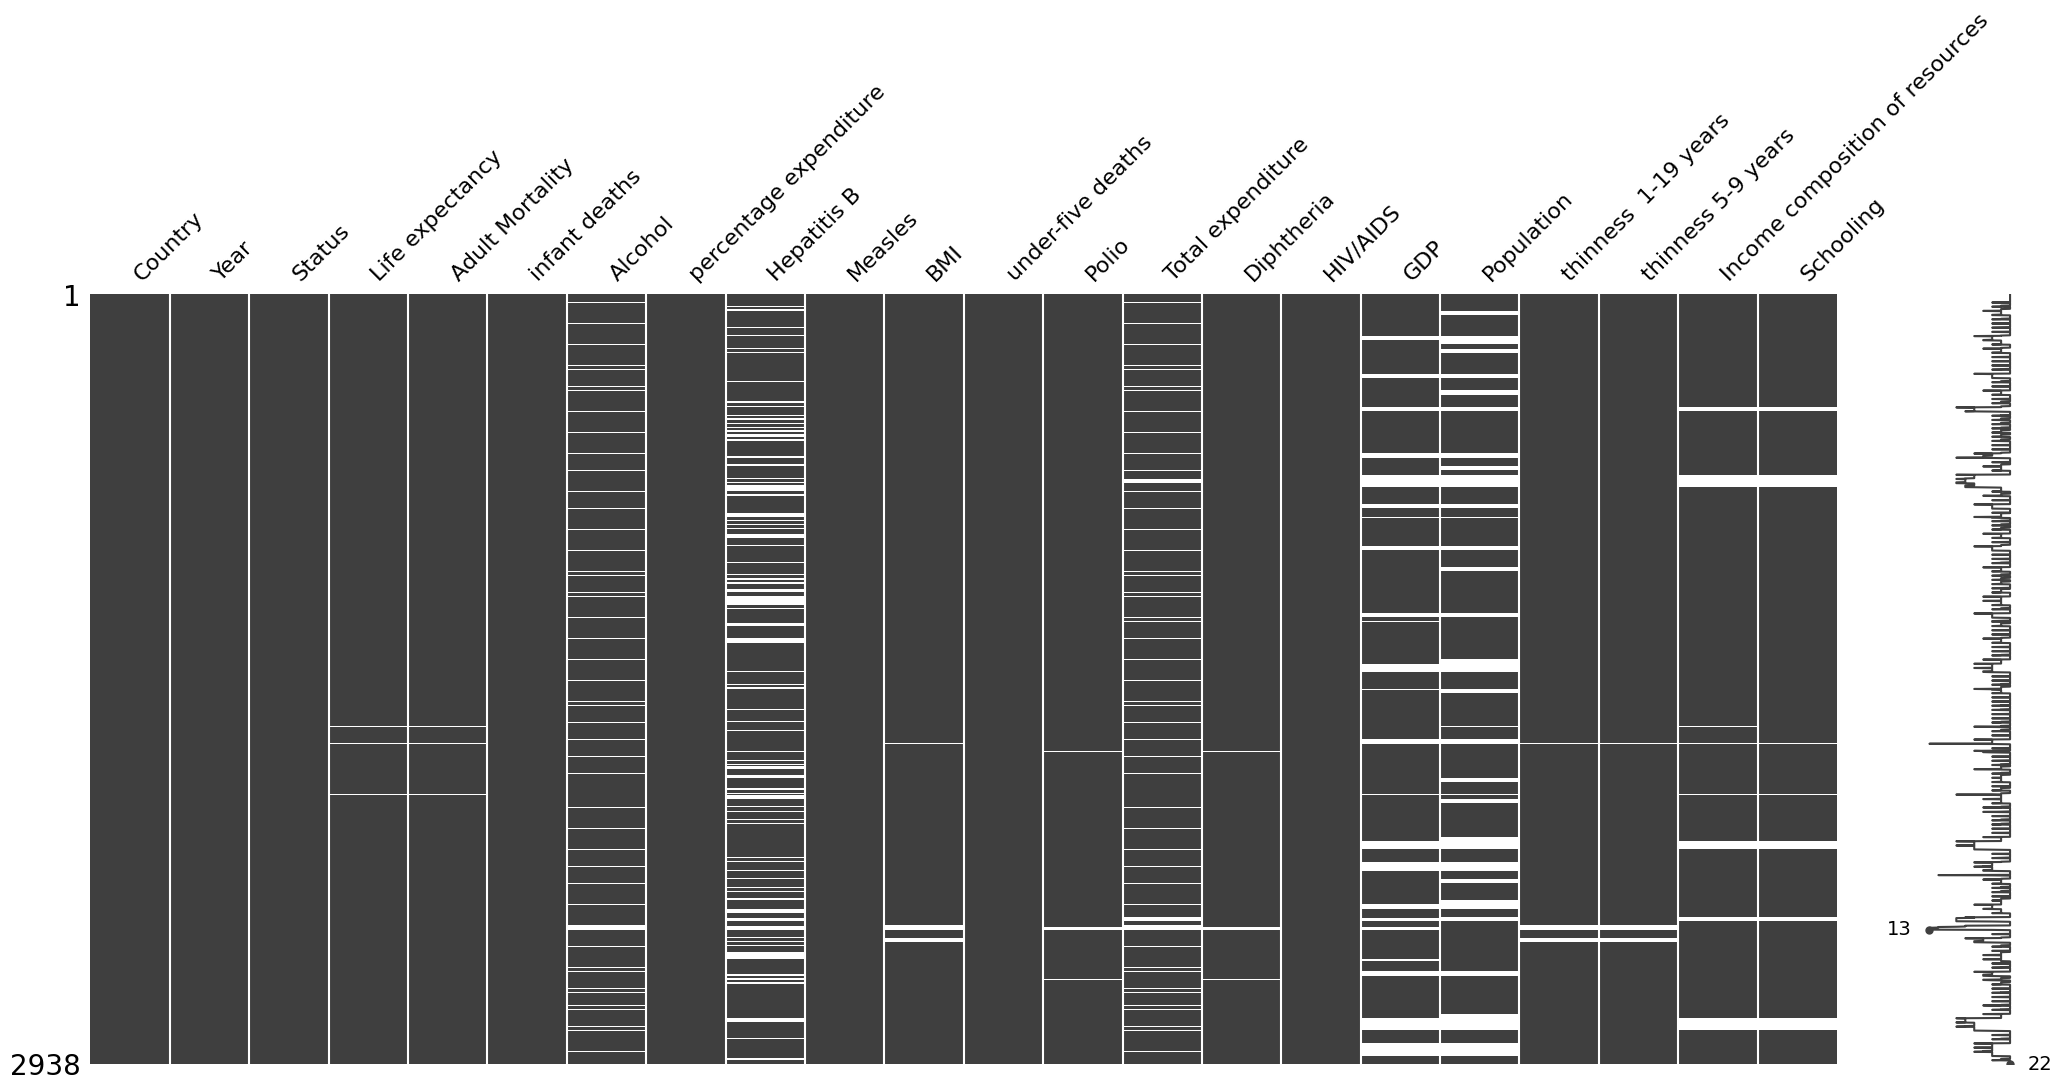

In [22]:
msno.matrix(data)
plt.show()

## Alcohol NaN Hnadling

In [23]:
print('NaNs in Alcohol')
for year in data['Year'].unique():
    print(f'Year: {year}, NaNs: ',data[data['Year']==year]['Alcohol'].isnull().sum())

filtered = data[(data['Alcohol'].isnull()) & (data['Year'] != 2015)]
# print(filtered)
# print(filtered['Country'].unique())
# print(data[(data['Country'].isin(['South Sudan', 'Ethiopia', 'Sudan', 'Uganda', 'Kenya']))])

NaNs in Alcohol
Year: 2015, NaNs:  177
Year: 2014, NaNs:  1
Year: 2013, NaNs:  2
Year: 2012, NaNs:  1
Year: 2011, NaNs:  1
Year: 2010, NaNs:  1
Year: 2009, NaNs:  1
Year: 2008, NaNs:  1
Year: 2007, NaNs:  1
Year: 2006, NaNs:  1
Year: 2005, NaNs:  2
Year: 2004, NaNs:  1
Year: 2003, NaNs:  1
Year: 2002, NaNs:  1
Year: 2001, NaNs:  1
Year: 2000, NaNs:  1


In [24]:
# alcohol = data[data['Country'].isin(['South Sudan', 'Ethiopia', 'Sudan', 'Uganda', 'Kenya', 'Bangladesh', 'Vanuatu', 'Montenegro'])]

alcohol = data.pivot(index='Year', columns='Country', values='Alcohol')
alcohol.interpolate(method='linear', inplace=True)
print(alcohol.isnull().sum()[alcohol.isnull().sum()>1])
alcohol.bfill(inplace=True)
alcohol.ffill(inplace=True)
# print(alcohol.isnull().sum()[alcohol.isnull().sum()>1])
# print(alcohol)

Country
Cook Islands             13
Dominica                 13
Marshall Islands         13
Monaco                   13
Nauru                    13
Niue                     13
Palau                    16
Saint Kitts and Nevis    13
San Marino               13
South Sudan              16
Tuvalu                   13
dtype: int64


In [25]:
def remove_error_values(column, data):
    pivot = data.pivot(index='Year', columns='Country', values=column)
    pivot.interpolate(method='linear', inplace=True)
    pivot.bfill(inplace=True)
    pivot.ffill(inplace=True)

    cols_to_interp = pivot.columns[pivot.mean() > 0.03]
    pivot = pivot[cols_to_interp].replace(0.01, np.nan)
    pivot.interpolate(method='linear', inplce=True, axis=0)

    unpivot = alcohol.reset_index().melt(id_vars='Year', 
                                                var_name='Country', 
                                                value_name=column)
    
    updated_data = pd.merge(data,unpivot,
                        how='left',
                        on = ['Year', 'Country'],
                        suffixes=("",'_updated' ))
    update_column = column + '_updated'
    updated_data[column] = updated_data[update_column].combine_first(updated_data[column])
    updated_data.drop(columns=[update_column])

    return data

In [26]:
cols_to_interp = alcohol.columns[alcohol.mean() > 0.03]
alcohol = alcohol[cols_to_interp].replace(0.01, np.nan)
alcohol.interpolate(method='linear', inplace=True, axis=0)
alcohol

Country  Albania  Algeria  Angola  Antigua and Barbuda  Argentina  Armenia  \
Year                                                                         
2000        3.66     0.25    1.85                 7.27       7.68     2.90   
2001        4.25     0.23    2.58                 7.51       7.76     2.86   
2002        3.73     0.36    2.82                 7.21       7.81     2.86   
2003        4.29     0.34    3.49                 7.16       7.62     3.03   
2004        4.54     0.45    3.53                 7.28       7.63     3.81   
2005        5.16     0.50    5.04                 8.15       7.53     4.25   
2006        5.31     0.36    5.84                 8.93       7.75     4.01   
2007        5.58     0.44    6.35                 8.64       8.16     3.99   
2008        5.61     0.46    7.07                 8.27       8.41     3.96   
2009        5.79     0.50    7.01                 7.82       8.33     3.96   
2010        5.28     0.45    7.80                 7.84       8.15     4.23   
2011        5.37     0.56    8.06                 7.84       8.11     4.09   
2012        5.14     0.66    8.24                 8.18       8.35     3.89   
2013        4.76     0.53    8.10                 8.58       8.28     3.79   
2014        4.51     0.53    8.33                 8.56       7.93     3.91   
2015        4.60     0.53    8.33                 8.56       7.93     3.91   

Country  Australia  Austria  Azerbaijan  Bahamas  ...  \
Year                                              ...   
2000         10.17    13.20        0.65    12.15  ...   
2001          9.53    12.40        0.51    11.64  ...   
2002          9.84    12.50        0.55    10.85  ...   
2003          9.97    12.20        0.55    10.68  ...   
2004          9.84    12.10        0.62    10.10  ...   
2005         10.30    12.40        0.73    10.49  ...   
2006         10.31    12.40        0.85    11.07  ...   
2007         10.56    12.50        1.02    10.75  ...   
2008         10.76    12.00        1.18    10.15  ...   
2009         10.62    11.30        2.10     9.29  ...   
2010         10.52    12.10        1.98     9.19  ...   
2011         10.30    12.04        1.98     9.34  ...   
2012         10.03    12.26        2.06     9.50  ...   
2013          9.87    11.82        2.14     9.42  ...   
2014          9.71    12.32        2.14     9.45  ...   
2015          9.71    12.32        2.14     9.45  ...   

Country  United Republic of Tanzania  United States of America  Uruguay  \
Year                                                                      
2000                            3.89                      8.21     6.65   
2001                            4.09                      8.25     6.48   
2002                            3.37                      8.33     5.86   
2003                            2.34                      8.40     5.11   
2004                            3.81                      8.48     5.66   
2005                            3.94                      8.52     6.35   
2006                            4.07                      8.63     6.58   
2007                            4.40                      8.74     6.67   
2008                            3.44                      8.74     6.76   
2009                            3.97                      8.71     6.67   
2010                            4.19                      8.55     6.21   
2011                            4.04                      8.67     5.97   
2012                            3.98                      8.82     5.77   
2013                            4.20                      8.82     5.82   
2014                            4.20                      8.82     6.03   
2015                            4.20                      8.82     6.03   

Country  Uzbekistan  Vanuatu  Venezuela (Bolivarian Republic of)  Viet Nam  \
Year                                                                         
2000           1.60     1.21                                8

In [27]:
print(alcohol.isnull().sum()[alcohol.isnull().sum()>0])

Country
Estonia       2
Montenegro    5
dtype: int64


In [28]:
alcohol[['Estonia','Montenegro', 'Saint Kitts and Nevis']]
alcohol.bfill(inplace=True)
print(alcohol.isnull().sum()[alcohol.isnull().sum()>0])

Series([], dtype: int64)


In [29]:
unpivot = alcohol.reset_index().melt(id_vars='Year', 
                                                var_name='Country', 
                                                value_name='Alcohol')
unpivot

Year   Country  Alcohol
0     2000   Albania     3.66
1     2001   Albania     4.25
2     2002   Albania     3.73
3     2003   Albania     4.29
4     2004   Albania     4.54
...    ...       ...      ...
2795  2011  Zimbabwe     6.00
2796  2012  Zimbabwe     6.09
2797  2013  Zimbabwe     6.39
2798  2014  Zimbabwe     6.50
2799  2015  Zimbabwe     6.50

[2800 rows x 3 columns]

In [30]:
data[['Year','Country','Alcohol']]

updated_data = pd.merge(data,unpivot,
                        how='left',
                        on = ['Year', 'Country'],
                        suffixes=("",'_updated' ))
updated_data['Alcohol'] = updated_data['Alcohol_updated'].combine_first(updated_data['Alcohol'])
updated_data.drop(columns=['Alcohol_updated'])

Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      Population  thinness  1-19 years  thinness 5-9 years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937         

In [31]:
print('NaNs in Alcohol')
for year in data['Year'].unique():
    print(f'Year: {year}, NaNs: ',data[data['Year']==year]['Alcohol'].isnull().sum())

filtered = data[(data['Alcohol'].isnull()) & (data['Year'] != 2015)]
# print(filtered)
# print(filtered['Country'].unique())
# print(data[(data['Country'].isin(['South Sudan', 'Ethiopia', 'Sudan', 'Uganda', 'Kenya']))])

NaNs in Alcohol
Year: 2015, NaNs:  177
Year: 2014, NaNs:  1
Year: 2013, NaNs:  2
Year: 2012, NaNs:  1
Year: 2011, NaNs:  1
Year: 2010, NaNs:  1
Year: 2009, NaNs:  1
Year: 2008, NaNs:  1
Year: 2007, NaNs:  1
Year: 2006, NaNs:  1
Year: 2005, NaNs:  2
Year: 2004, NaNs:  1
Year: 2003, NaNs:  1
Year: 2002, NaNs:  1
Year: 2001, NaNs:  1
Year: 2000, NaNs:  1


### It appears as well as NaNs some values are defined as 0.01 when there is no data.
This can be solved by either taking the mean or by using a linear regression based on other data and comparing it to other countries. (Would need to account for whether a nation is primarily Muslim in this calculation)

In [32]:
data = updated_data

In [33]:
print(data['Alcohol'].isnull().sum()[data['Alcohol'].isnull().sum()>0])

[24]


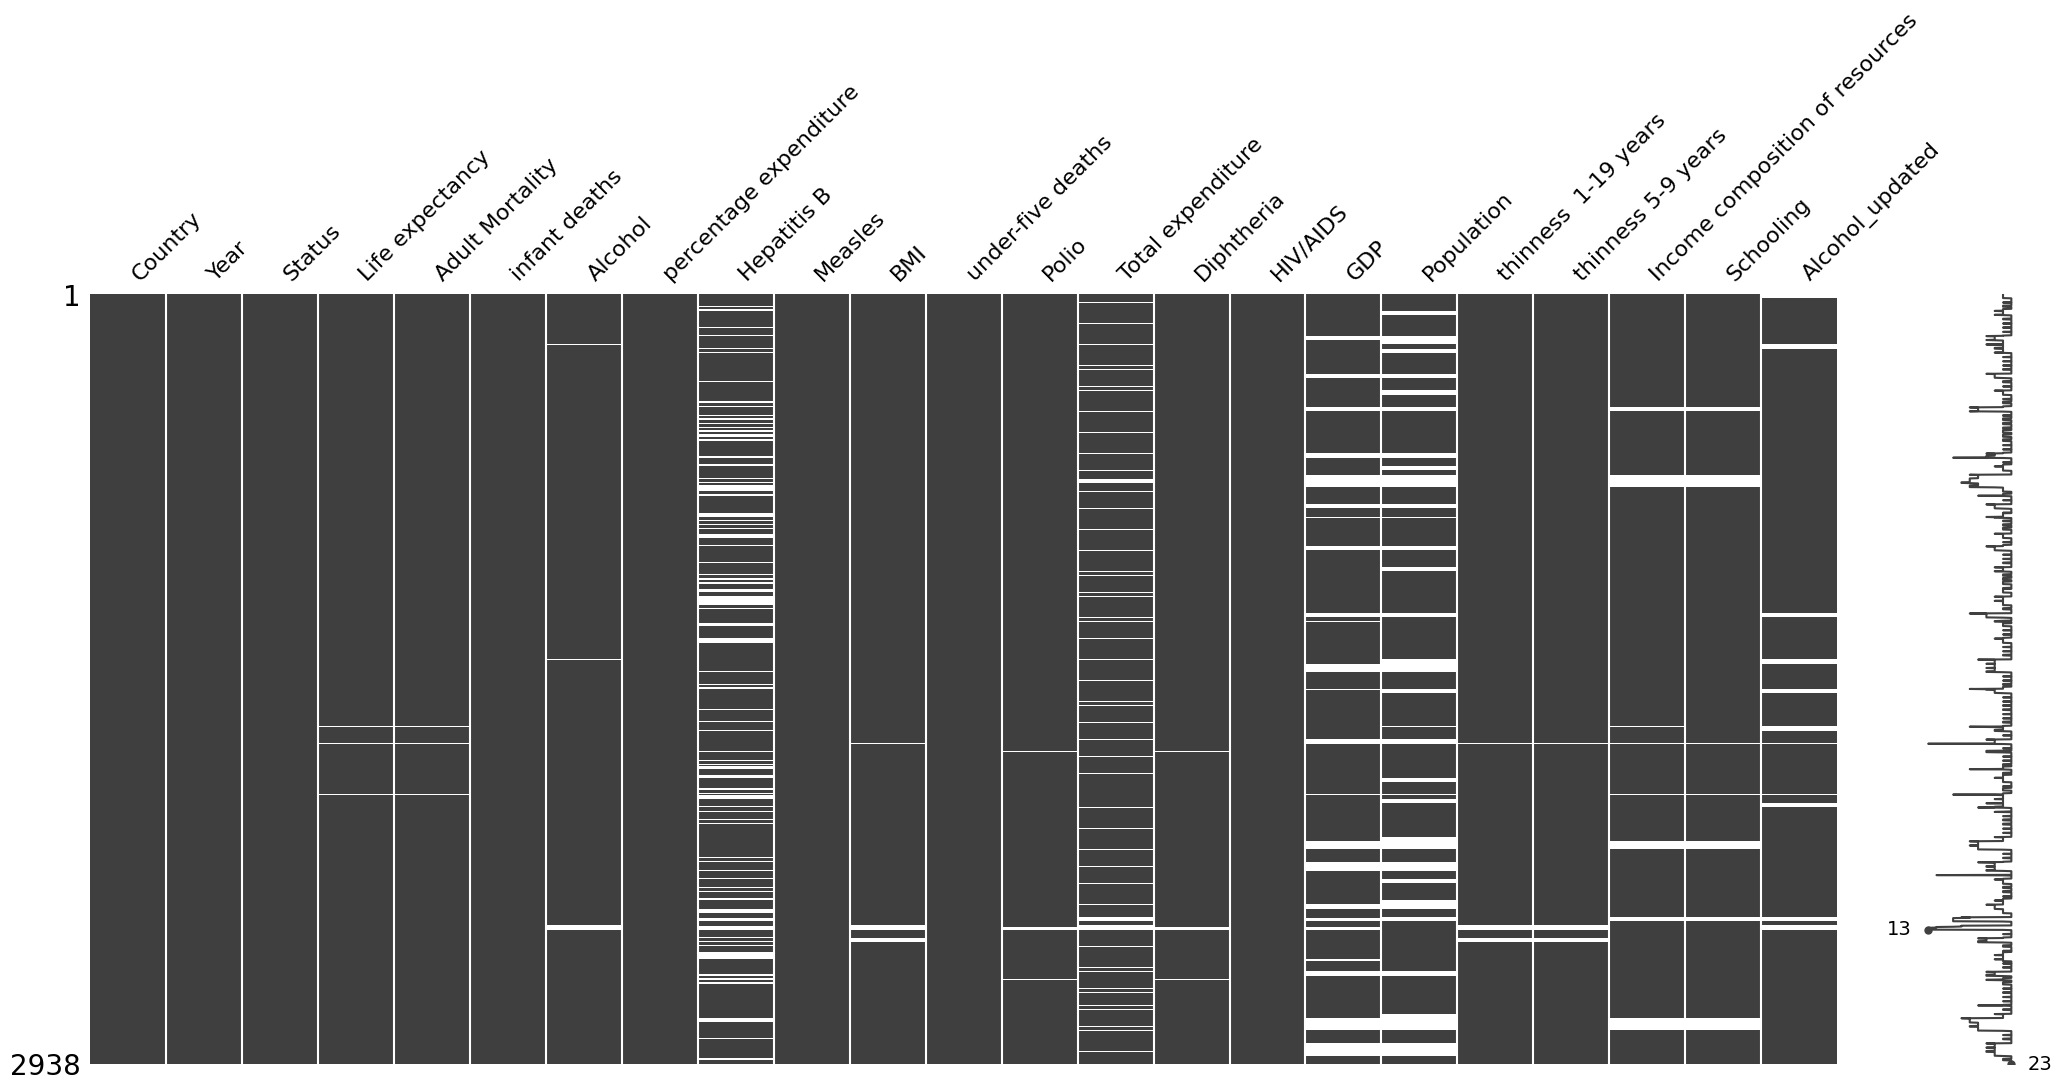

In [34]:
msno.matrix(data)
plt.show()

In [35]:
new_life_expectancy = data.loc[data['Year'] ==2015, ['Country','Life expectancy', 'Status']][::3].sort_values('Life expectancy',ascending=False)
new_life_expectancy

Country  Life expectancy      Status
673          Cyprus             85.0   Developed
2313      Singapore             83.1   Developed
2505         Sweden             82.4   Developed
1538     Luxembourg             82.0   Developed
1829    Netherlands             81.9   Developed
...             ...              ...         ...
2409    South Sudan             57.3  Developing
480        Cameroon             57.3  Developing
432   Côte d'Ivoire             53.3  Developing
528            Chad             53.1  Developing
48           Angola             52.4  Developing

[61 rows x 3 columns]

In [36]:
# def barchart(metrics):
#     plt.subplots(figsize=(14,9))
#     for metric in metrics:
#         sub_data = data.loc[data['Year'] ==2012, ['Country',metric, 'Status']][::3].sort_values(metric,ascending=False)
#         color_map = {'Developed': 'green', 'Developing': 'orange'}
#         colors = [color_map[status] for status in sub_data['Status']]

        
#         plt.bar(sub_data['Country'], sub_data[metric], color = colors)
#         plt.xticks(rotation=45, ha='right')
#         plt.xlabel('Countries')
#         plt.ylabel(f'{metric}')
#         legend_elements = [Patch(facecolor='green', label='Developed'),
#                         Patch(facecolor='orange', label='Developing')]
#         plt.legend(handles=legend_elements, loc='upper right', fontsize=12)
#         plt.title(f'{metric} in 2012')
#     plt.show()



def barchart(metrics, data):
    # Determine the number of rows needed based on metrics
    n_cols = 2
    n_rows = (len(metrics) + n_cols - 1) // n_cols  # Calculate rows needed for 4 columns per row

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))  # Adjust figure size for layout
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    color_map = {'Developed': 'green', 'Developing': 'orange'}

    for i, metric in enumerate(metrics):
        # Prepare the data for the specific metric
        sub_data = data.loc[data['Year'] == 2012, ['Country', metric, 'Status']][::6].sort_values(metric, ascending=False)
        colors = [color_map[status] for status in sub_data['Status']]

        ax = axes[i]  # Select the appropriate subplot
        ax.bar(sub_data['Country'], sub_data[metric], color=colors)
        ax.set_xticks(range(len(sub_data['Country'])))
        ax.set_xticklabels(sub_data['Country'], rotation=45, ha='right')
        ax.set_xlabel('Countries')
        ax.set_ylabel(f'{metric}')
        ax.set_title(f'{metric} in 2012')

        # Add legend to the last subplot of each row
        if i == len(metrics) - 1 or (i + 1) % n_cols == 0:
            legend_elements = [Patch(facecolor='green', label='Developed'),
                               Patch(facecolor='orange', label='Developing')]
            ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

    # Hide any unused subplots
    for j in range(len(metrics), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


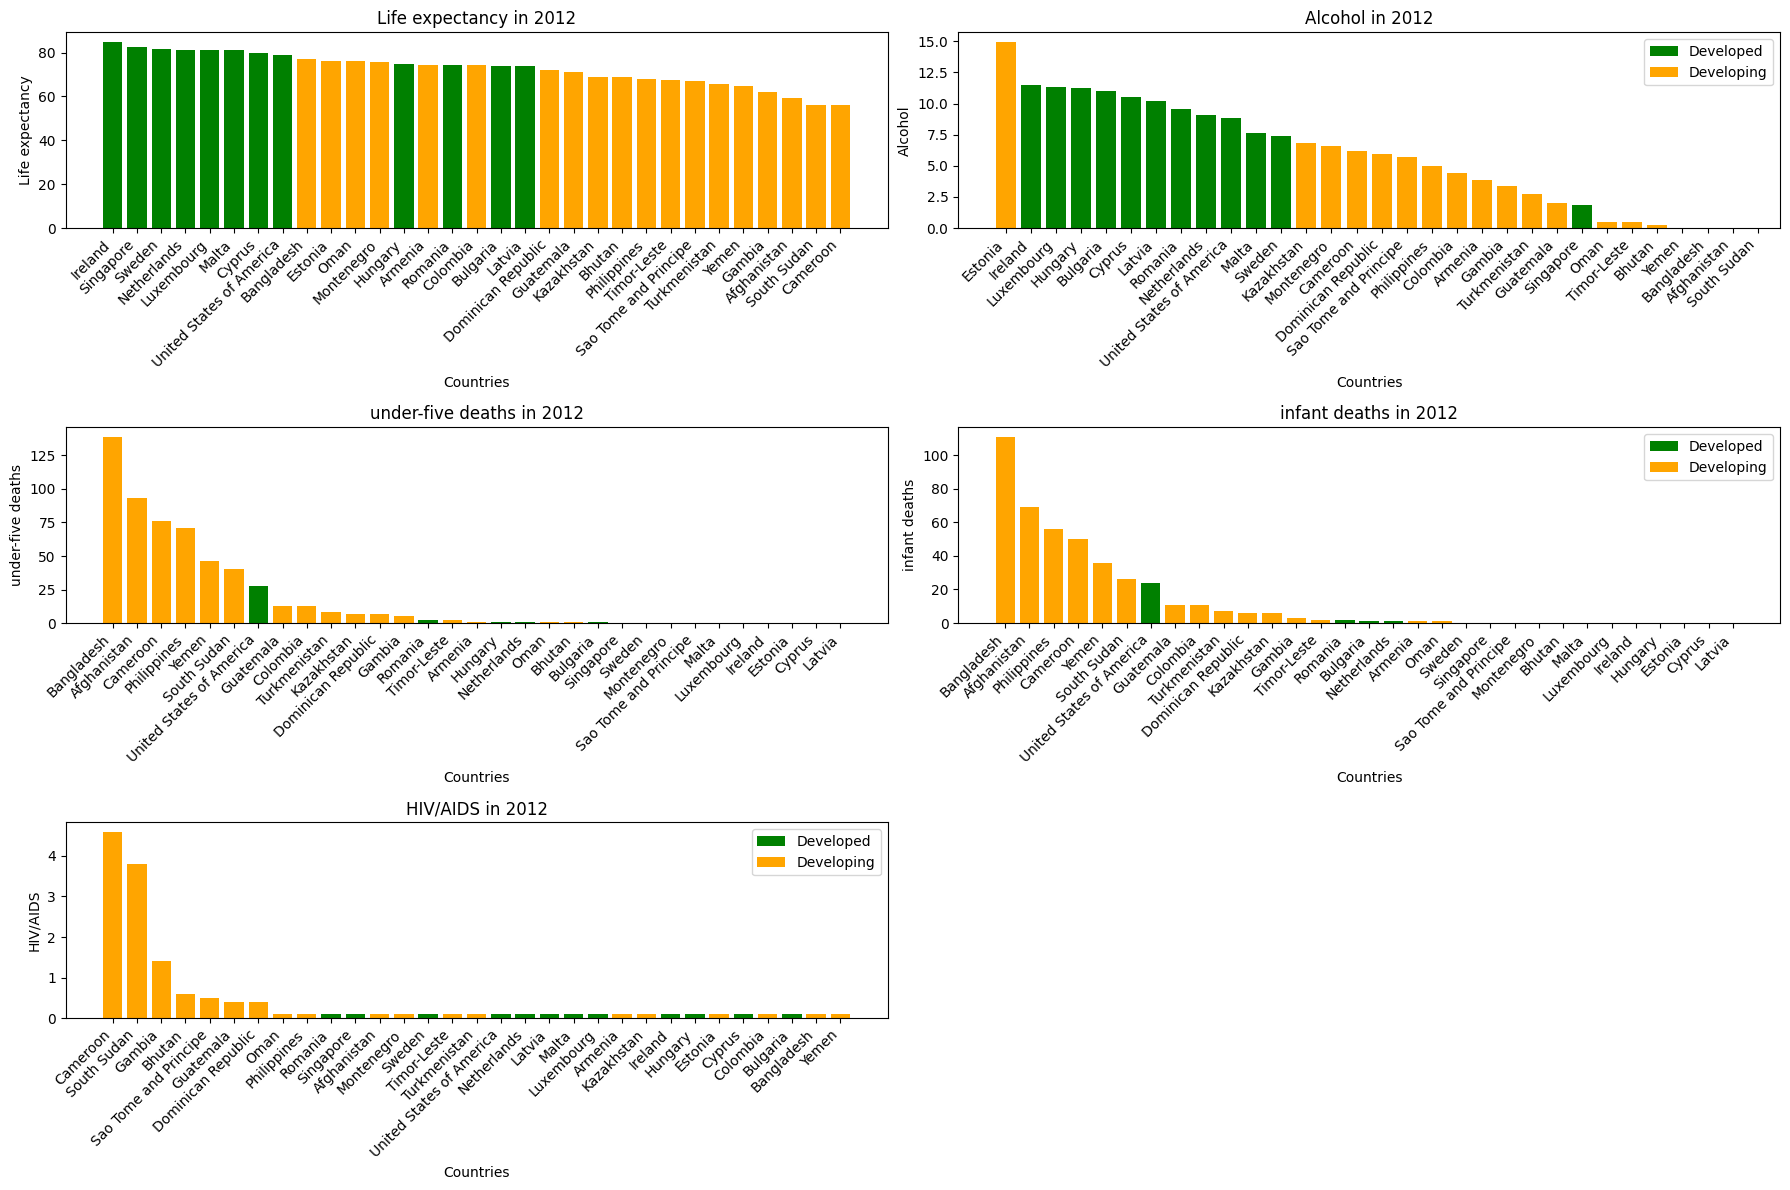

In [37]:
values = ['Life expectancy', 'Alcohol', 'under-five deaths', 'infant deaths', 'HIV/AIDS']
barchart(values, data)

## Fix GDP and Population data using external sources


In [38]:
popuation = data.pivot(index='Year', columns='Country', values='Population')
popuation

Country  Afghanistan    Albania     Algeria      Angola  Antigua and Barbuda  \
Year                                                                           
2000        293756.0    38927.0   3118366.0   1644924.0                  NaN   
2001       2966463.0    36173.0  31592153.0  16983266.0                  NaN   
2002      21979923.0     3511.0   3199546.0  17572649.0                  NaN   
2003       2364851.0   339616.0   3243514.0   1823369.0                  NaN   
2004      24118979.0   326939.0   3283196.0  18865716.0                  NaN   
2005        257798.0   311487.0  33288437.0  19552542.0                  NaN   
2006       2589345.0  2992547.0  33777915.0   2262399.0                  NaN   
2007      26616792.0    29717.0     34376.0   2997687.0                  NaN   
2008       2729431.0  2947314.0   3486715.0   2175942.0                  NaN   
2009        284331.0  2927519.0   3546576.0  22549547.0                  NaN   
2010       2883167.0   291321.0  36117637.0  23369131.0                  NaN   
2011       2978599.0   295195.0  36819558.0  24218565.0                  NaN   
2012       3696958.0     2941.0  37565847.0    259615.0                  NaN   
2013      31731688.0   289592.0  38338562.0   2599834.0                  NaN   
2014        327582.0   288914.0  39113313.0   2692466.0                  NaN   
2015      33736494.0    28873.0  39871528.0   2785935.0                  NaN   

Country   Argentina    Armenia   Australia    Austria  Azerbaijan  ...  \
Year                                                               ...   
2000      3757452.0   369588.0     19153.0   811566.0      8486.0  ...   
2001      3747159.0    35655.0     19413.0   842293.0     81112.0  ...   
2002      3788937.0   333897.0    196514.0   881957.0    817195.0  ...   
2003      3839379.0    31786.0    198954.0  8121423.0     82341.0  ...   
2004     38728696.0     3612.0     21274.0  8171966.0      8365.0  ...   
2005     39145488.0  2981259.0     23948.0  8227829.0    839185.0  ...   
2006      3955889.0    29585.0     26979.0  8268641.0    848455.0  ...   
2007      3997224.0   293356.0     28276.0  8295487.0     85813.0  ...   
2008      4382389.0    29822.0    212492.0  8321496.0     87634.0  ...   
2009       479947.0  2888584.0    216917.0  8343323.0   8947243.0  ...   
2010     41223889.0  2877311.0    223175.0   836344.0    954332.0  ...   
2011     41656879.0  2875581.0    223424.0  8391643.0    917382.0  ...   
2012      4296739.0  2881922.0  22728254.0  8429991.0   9295784.0  ...   
2013     42539925.0   289359.0  23117353.0  8479375.0    941681.0  ...   
2014     42981515.0    29622.0   2346694.0  8541575.0    953579.0  ...   
2015     43417765.0   291695.0  23789338.0  8633169.0   9649341.0  ...   

Country  United Republic of Tanzania  United States of America    Uruguay  \
Year                                                                        
2000                             NaN                       NaN  3321245.0   
2001                             NaN                       NaN   332713.0   
2002                             NaN                       NaN  3327773.0   
2003                             NaN                       NaN  3325637.0   
2004                             NaN                       NaN   332496.0   
2005                             NaN                       NaN  3325612.0   
2006                             NaN                       NaN   333143.0   
2007                             NaN                       NaN  3339741.0   
2008                             NaN                       NaN   335824.0   
2009                             NaN                       NaN  3362755.0   
2010                             NaN                       NaN  3374415.0   
2011                             NaN                       NaN  3385624.0   
2012                             NaN                       NaN  3396777.0   
2013                             NaN                       NaN     3485

In [39]:
gdp = data.pivot(index='Year', columns='Country', values='GDP')
gdp

Country  Afghanistan      Albania      Algeria       Angola  \
Year                                                          
2000      114.560000  1175.788981  1757.177970   555.296942   
2001      117.496980  1326.973390  1732.857979   526.168743   
2002      187.845950  1453.642777  1774.336730   711.181716   
2003      198.728544   189.681557   294.335560   779.468356   
2004      219.141353  2416.588235  2598.982300   141.868440   
2005       25.294130   279.142931    31.122378  1443.991929   
2006      272.563770    35.129300  3464.617900   262.415149   
2007      369.835796   363.136850  3935.183343  2878.837144   
2008      373.361116   437.539647   495.254866  3868.578883   
2009      445.893298  4114.136545  3868.831230  3347.844850   
2010      553.328940   494.358832  4463.394675  3529.534820   
2011       63.537231  4437.178680  5432.252300  4299.128890   
2012      669.959000  4247.614380  5564.825660  4598.249988   
2013      631.744976  4414.723140  5471.866766   484.616884   
2014      612.696514  4575.763787   547.851700   479.312240   
2015      584.259210  3954.227830  4132.762920  3695.793748   

Country  Antigua and Barbuda     Argentina      Armenia    Australia  \
Year                                                                   
2000             9875.161736   7669.273916   622.742748   2169.92100   
2001             9358.154162    717.694674   694.435119  19517.84168   
2002             9386.716452   2579.193168   783.261699    281.81763   
2003             9739.825560    333.437600    93.166157  23465.38559   
2004             1352.837400   4251.574348  1191.961920   3472.37977   
2005            11371.938950    576.883829  1643.758397   3416.71483   
2006            12724.393770   5878.761270  2158.299000  36118.28381   
2007            14252.294520   7193.617640  3138.887300   4991.98289   
2008             1473.319230   8953.359275    41.269970  49664.68540   
2009             1312.466920   8161.369660  2993.832531  42742.99898   
2010            12126.876140   1276.265000  3218.381655  51874.84800   
2011            11929.349910  12726.983600  3526.978143  62245.12900   
2012            12565.441970  12969.771200  3684.848100  67677.63477   
2013            12224.864160  12976.636420  3843.591213  67792.33860   
2014            12888.296670  12245.256450  3994.712355  62214.69120   
2015            13566.954100  13467.123600   369.654776  56554.38760   

Country      Austria   Azerbaijan  ...  United Republic of Tanzania  \
Year                               ...                                
2000     24517.26745   655.974326  ...                          NaN   
2001     24489.73553    73.683843  ...                          NaN   
2002     26351.37568   763.738580  ...                          NaN   
2003      3212.93550   883.643996  ...                          NaN   
2004     36693.42620   145.216300  ...                          NaN   
2005     38242.42520  1578.423900  ...                          NaN   
2006       443.99361  2473.857760  ...                          NaN   
2007     46586.65250  3851.437869  ...                          NaN   
2008     51386.37665  5574.638200  ...                          NaN   
2009     47654.18721   495.294791  ...                          NaN   
2010     46657.62900  5842.857840  ...                          NaN   
2011     51126.74139  7189.691229  ...                          NaN   
2012     48333.57273  7496.335728  ...                          NaN   
2013       554.71532  7875.756953  ...                          NaN   
2014     51322.63997  7891.299776  ...                          NaN   
2015     43665.94700    55.313820  ...                          NaN   

Country  United States of America       Uruguay   Uzbekistan      Vanuatu  \
Year                                                                        
2000                          NaN   6871.897677   558.221144  1469.849149   
2001                          NaN   6281.377470   456.7348

In [40]:
def check_nans(data):
    count = 0
    for column in data:
        if data[column].isnull().sum() > 0:
            count += 1
            print(f'Country: {column} has {data[column].isnull().sum()} NaNs')
    print('\n \n ----------- \n \n')
    print(f'{count} Countries have NaNs')

check_nans(gdp)

Country: Bahamas has 16 NaNs
Country: Bolivia (Plurinational State of) has 16 NaNs
Country: Congo has 16 NaNs
Country: Cook Islands has 16 NaNs
Country: Czechia has 16 NaNs
Country: Côte d'Ivoire has 16 NaNs
Country: Democratic People's Republic of Korea has 16 NaNs
Country: Democratic Republic of the Congo has 16 NaNs
Country: Dominica has 15 NaNs
Country: Egypt has 16 NaNs
Country: Eritrea has 4 NaNs
Country: Gambia has 16 NaNs
Country: Iran (Islamic Republic of) has 16 NaNs
Country: Iraq has 4 NaNs
Country: Kyrgyzstan has 16 NaNs
Country: Lao People's Democratic Republic has 16 NaNs
Country: Libya has 4 NaNs
Country: Marshall Islands has 15 NaNs
Country: Micronesia (Federated States of) has 16 NaNs
Country: Monaco has 16 NaNs
Country: Nauru has 15 NaNs
Country: Niue has 16 NaNs
Country: Palau has 15 NaNs
Country: Papua New Guinea has 1 NaNs
Country: Republic of Korea has 16 NaNs
Country: Republic of Moldova has 16 NaNs
Country: Saint Kitts and Nevis has 16 NaNs
Country: Saint Lucia 

In [41]:
wiki_gdp = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita')
gdp_all = pd.merge(wiki_gdp[3],wiki_gdp[4],how='left', on='Country (or dependent territory)')
gdp_all.rename(columns={'Country (or dependent territory)':'Country'},inplace=True)
# gdp_all.T
# gdp_all.set_index('Year', inplace=True)
gdp_all.drop(columns=['2016', '2017', '2018', '2019'], inplace=True)
gdp_all


Country    2000    2001    2002    2003    2004    2005    2006  \
0    Afghanistan     NaN     NaN   208.0   201.0   218.0   253.0   272.0   
1        Albania  1129.0  1283.0  1428.0  1830.0  2371.0  2674.0  2973.0   
2        Algeria  1948.0  1919.0  1958.0  2305.0  2840.0  3258.0  3691.0   
3        Andorra     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4         Angola   771.0   731.0   988.0  1122.0  1438.0  2128.0  2909.0   
..           ...     ...     ...     ...     ...     ...     ...     ...   
191      Vietnam   499.0   513.0   547.0   610.0   757.0   873.0   996.0   
192    Palestine  1413.0  1276.0  1103.0  1197.0  1351.0  1461.0  1481.0   
193        Yemen   527.0   522.0   551.0   591.0   678.0   796.0   881.0   
194       Zambia   364.0   380.0   399.0   452.0   556.0   720.0  1066.0   
195     Zimbabwe   970.0   964.0   923.0   822.0   807.0   765.0   678.0   

       2007    2008    2009     2010     2011   2012   2013   2014   2015  
0     330.0   390.0   441.0    544.0    612.0    666    639    630    594  
1    3595.0  4371.0  4114.0   4098.0   4440.0   4249   4416   4585   3954  
2    4208.0  5215.0  4262.0   4941.0   5946.0   6058   5998   6109   4692  
3       NaN     NaN     NaN  49030.0  51957.0  45714  45630  46299  38877  
4    3493.0  4554.0  3630.0   4089.0   5175.0   5700   5881   6062   4681  
..      ...     ...     ...      ...      ...    ...    ...    ...    ...  
191  1152.0  1447.0  1481.0   1628.0   1950.0   2198   2370   2567   2582  
192  1564.0  1913.0  2062.0   2406.0   2712.0   2889   3123   3159   3084  
193   971.0  1171.0  1061.0   1268.0   1304.0   1370   1519   1580   1508  
194  1134.0  1394.0  1151.0   1469.0   1644.0   1730   1841   1725   1308  
195   647.0   553.0   790.0    976.0   1132.0   1310   1422   1415   1418  

[196 rows x 17 columns]

In [42]:
print(gdp_all[gdp_all['Country']=='Uruguay'])
print(gdp['Uruguay'])

     Country    2000    2001    2002    2003    2004    2005    2006    2007  \
187  Uruguay  7432.0  6804.0  4441.0  3942.0  4477.0  5663.0  6377.0  7623.0   

       2008     2009     2010     2011   2012   2013   2014   2015  
187  9857.0  10232.0  12944.0  15341.0  16325  18272  18110  16792  
Year
2000     6871.897677
2001     6281.377470
2002      488.768855
2003     3622.522840
2004     4117.388530
2005      522.951116
2006     5877.876780
2007       79.697460
2008      962.312164
2009     9415.173860
2010    11938.212000
2011    14166.499800
2012     1592.681900
2013    16881.256800
2014    16737.898270
2015    15524.842470
Name: Uruguay, dtype: float64
